In [1]:
import pandas as pd

In [2]:
# 사전투표일 : 2017년 5월 4일 ~ 2017년 5월 5일 오전 6시 ~ 오후 6시
# 투표일 : 2017년 5월 9일 오전 6시 ~ 오후 6시

## 대통령
raw_president_19 = pd.read_csv("./1st_preproc_data/대통령_19.csv", index_col=0)

In [3]:
# 사전투표일 : 2018년 6월 8일 ~ 2018년 6월 9일 오전 6시 ~ 오후 6시
# 투표일 : 2018년 6월 13일 오전 6시 ~ 오후 6시

## 시장 도지사 (big_mayor)
raw_big_mayor_7 = pd.read_csv("./1st_preproc_data/시장도지사_7.csv", index_col=0)
## 구청장 군청장 (small mayor)
raw_small_mayor_7 = pd.read_csv("./1st_preproc_data/구청군청장_7.csv", index_col=0)
## 시도의회의원 (Local Council Member / lcm)
raw_lcm_7 = pd.read_csv("./1st_preproc_data/시도의회의원_7.csv", index_col=0)

In [4]:
# 사전투표일 : 2020년 4월 10일 ~ 2020년 4월 11일 오전 6시 ~ 오후 6시
# 투표일 : 2020년 4월 15일 오전 6시 ~ 오후 6시

## 국회의원 (National Council Memeber / ncm)
raw_ncm_21 = pd.read_csv("./1st_preproc_data/국회의원_21.csv", index_col=0)

In [5]:
# 사전투표일 : 2022년 3월 4일 ~ 2022년 3월 5일 오전 6시 ~ 오후 6시
# 투표일 : 2022년 3월 9일 오전 6시 ~ 오후 6시

raw_president_20 = pd.read_csv("./1st_preproc_data/대통령_20.csv", index_col=0)

In [6]:
# 사전투표일 : 2022년 5월 27일(금)~2022년 5월 28일(토) 오전 6시~오후 6시
# 투표일 : 2022년 6월 1일(수) 오전 6시~오후 6시

## 시장 도지사 (big_mayor)
raw_big_mayor_8 = pd.read_csv("./1st_preproc_data/시장도지사_8.csv", index_col=0)
## 구청장 군청장 (small mayor)
raw_small_mayor_8 = pd.read_csv("./1st_preproc_data/구청군청장_8.csv", index_col=0)
## 시도의회의원 (Local Council Member / lcm)
raw_lcm_8 = pd.read_csv("./1st_preproc_data/시도의회의원_8.csv", index_col=0)

In [7]:
def append_position_series(df):
    df["position"] = ""
    lib_condition = df["lib"] > df["con"]
    con_condition = df["lib"] <= df["con"]
    df.loc[lib_condition, ["position"]] = "lib"
    df.loc[con_condition, ["position"]] = "con"
    return df


def calc_total_ratio(df):
    ratio_df = df["position"].value_counts() / len(df)
    ratio_df = ratio_df.to_frame().T
    ratio_df.index = ["대한민국"]
    ratio_df.index.name = "loc"
    ratio_df = ratio_df.loc[:, ["lib"]]
    return ratio_df


def calc_loc_1_ratio(df):
    df_gb = df.groupby(["loc_1"])
    ratio_df = df_gb["position"].value_counts().reset_index(level=1)
    ratio_df["ratio"] = ratio_df["count"].div(df_gb.size())
    ratio_df.index.name = "loc"
    ratio_df = ratio_df.drop(columns=["count"])
    ratio_df = ratio_df.pivot(columns=["position"]).fillna(0)
    ratio_df.columns = ratio_df.columns.get_level_values(level=1)
    ratio_df = ratio_df.loc[:, ["lib"]]
    return ratio_df


def calc_loc_2_ratio(df):
    df_gb = df.groupby(["loc_1", "loc_2"])
    ratio_df = df_gb["position"].value_counts().reset_index(level=[2])
    ratio_df["ratio"] = ratio_df["count"].div(df_gb.size())
    ratio_df = ratio_df.drop(columns=["count"])
    ratio_df = ratio_df.pivot(columns=["position"]).fillna(0)
    ratio_df.columns = ratio_df.columns.get_level_values(level=1)
    ratio_df = ratio_df.loc[:, ["lib"]]
    return ratio_df

In [8]:
president_19 = raw_president_19.copy()
president_19 = append_position_series(president_19)

total_ratio_2017_05 = calc_total_ratio(president_19)
loc_1_ratio_2017_05 = calc_loc_1_ratio(president_19)
loc_2_ratio_2017_05 = calc_loc_2_ratio(president_19)

In [9]:
#
big_mayor_7 = raw_big_mayor_7.copy()
big_mayor_7 = append_position_series(big_mayor_7)

total_ratio_2018_06_a = calc_total_ratio(big_mayor_7)
loc_1_ratio_2018_06_a = calc_loc_1_ratio(big_mayor_7)
loc_2_ratio_2018_06_a = calc_loc_2_ratio(big_mayor_7)

#
small_mayor_7 = raw_small_mayor_7.copy()
small_mayor_7 = append_position_series(small_mayor_7)

total_ratio_2018_06_b = calc_total_ratio(small_mayor_7)
loc_1_ratio_2018_06_b = calc_loc_1_ratio(small_mayor_7)
loc_2_ratio_2018_06_b = calc_loc_2_ratio(small_mayor_7)

#
lcm_7 = raw_lcm_7.copy()
lcm_7 = append_position_series(lcm_7)

total_ratio_2018_06_c = calc_total_ratio(lcm_7)
loc_1_ratio_2018_06_c = calc_loc_1_ratio(lcm_7)
loc_2_ratio_2018_06_c = calc_loc_2_ratio(lcm_7)

In [10]:
#
total_ratio_2018_06 = pd.concat(
    [total_ratio_2018_06_a, total_ratio_2018_06_b, total_ratio_2018_06_c], axis=1
)
total_ratio_2018_06 = pd.DataFrame(
    total_ratio_2018_06.mean(axis=1), columns=total_ratio_2017_05.columns
)

#
loc_1_ratio_2018_06 = pd.concat(
    [loc_1_ratio_2018_06_a, loc_1_ratio_2018_06_b, loc_1_ratio_2018_06_c], axis=1
)
loc_1_ratio_2018_06 = pd.DataFrame(
    loc_1_ratio_2018_06.mean(axis=1), columns=loc_1_ratio_2017_05.columns
)

#
loc_2_ratio_2018_06 = pd.concat(
    [loc_2_ratio_2018_06_a, loc_2_ratio_2018_06_b, loc_2_ratio_2018_06_c], axis=1
)
loc_2_ratio_2018_06 = pd.DataFrame(
    loc_2_ratio_2018_06.mean(axis=1), columns=loc_2_ratio_2017_05.columns
)

In [11]:
ncm_21 = raw_ncm_21.copy()
ncm_21 = append_position_series(ncm_21)

total_ratio_2020_04 = calc_total_ratio(ncm_21)
loc_1_ratio_2020_04 = calc_loc_1_ratio(ncm_21)
loc_2_ratio_2020_04 = calc_loc_2_ratio(ncm_21)

In [12]:
president_20 = raw_president_20.copy()
president_20 = append_position_series(president_20)

total_ratio_2022_03 = calc_total_ratio(president_20)
loc_1_ratio_2022_03 = calc_loc_1_ratio(president_20)
loc_2_ratio_2022_03 = calc_loc_2_ratio(president_20)

In [13]:
#
big_mayor_8 = raw_big_mayor_8.copy()
big_mayor_8 = append_position_series(big_mayor_8)

total_ratio_2022_06_a = calc_total_ratio(big_mayor_8)
loc_1_ratio_2022_06_a = calc_loc_1_ratio(big_mayor_8)
loc_2_ratio_2022_06_a = calc_loc_2_ratio(big_mayor_8)

#
small_mayor_8 = raw_small_mayor_8.copy()
small_mayor_8 = append_position_series(small_mayor_8)

total_ratio_2022_06_b = calc_total_ratio(small_mayor_8)
loc_1_ratio_2022_06_b = calc_loc_1_ratio(small_mayor_8)
loc_2_ratio_2022_06_b = calc_loc_2_ratio(small_mayor_8)

#
lcm_8 = raw_lcm_8.copy()
lcm_8 = append_position_series(lcm_8)

total_ratio_2022_06_c = calc_total_ratio(lcm_8)
loc_1_ratio_2022_06_c = calc_loc_1_ratio(lcm_8)
loc_2_ratio_2022_06_c = calc_loc_2_ratio(lcm_8)

In [14]:
#
total_ratio_2022_06 = pd.concat(
    [total_ratio_2022_06_a, total_ratio_2022_06_b, total_ratio_2022_06_c], axis=1
)
total_ratio_2022_06 = pd.DataFrame(
    total_ratio_2022_06.mean(axis=1), columns=total_ratio_2017_05.columns
)

#
loc_1_ratio_2022_06 = pd.concat(
    [loc_1_ratio_2022_06_a, loc_1_ratio_2022_06_b, loc_1_ratio_2022_06_c], axis=1
)
loc_1_ratio_2022_06 = pd.DataFrame(
    loc_1_ratio_2022_06.mean(axis=1), columns=loc_1_ratio_2017_05.columns
)

#
loc_2_ratio_2022_06 = pd.concat(
    [loc_2_ratio_2022_06_a, loc_2_ratio_2022_06_b, loc_2_ratio_2022_06_c], axis=1
)
loc_2_ratio_2022_06 = pd.DataFrame(
    loc_2_ratio_2022_06.mean(axis=1), columns=loc_2_ratio_2017_05.columns
)

In [15]:
total_ratio = pd.concat(
    [
        total_ratio_2017_05,
        total_ratio_2018_06,
        total_ratio_2020_04,
        total_ratio_2022_03,
        total_ratio_2022_06,
    ],
    axis=1,
)
total_ratio.columns = ["2017_05", "2018_06", "2020_04", "2022_03", "2022_06"]
total_ratio

,2017_05,2018_06,2020_04,2022_03,2022_06
loc,,,,,
대한민국,0.624176,0.70746,0.508465,0.392593,0.289938


In [16]:
loc_1_ratio = pd.concat(
    [
        loc_1_ratio_2017_05,
        loc_1_ratio_2018_06,
        loc_1_ratio_2020_04,
        loc_1_ratio_2022_03,
        loc_1_ratio_2022_06,
    ],
    axis=1,
)
loc_1_ratio.columns = ["2017_05", "2018_06", "2020_04", "2022_03", "2022_06"]
loc_1_ratio

,2017_05,2018_06,2020_04,2022_03,2022_06
loc,,,,,
강원도,0.329787,0.681667,0.297872,0.010638,0.107058
경기도,0.795699,0.858586,0.675824,0.598214,0.361683
경상남도,0.181818,0.331747,0.068852,0.032787,0.035850
경상북도,0.018072,0.061509,0.006024,0.000000,0.065476
광주광역시,1.000000,1.000000,1.000000,1.000000,1.000000
대구광역시,0.000000,0.054662,0.000000,0.000000,0.300355
대전광역시,0.949367,0.974684,0.620253,0.197531,0.170957
부산광역시,0.575610,0.788026,0.082927,0.000000,0.001481
서울특별시,0.969340,0.947203,0.823113,0.423529,0.202104


In [17]:
loc_2_ratio = pd.concat(
    [
        loc_2_ratio_2017_05,
        loc_2_ratio_2018_06,
        loc_2_ratio_2020_04,
        loc_2_ratio_2022_03,
        loc_2_ratio_2022_06,
    ],
    axis=1,
)
loc_2_ratio.columns = ["2017_05", "2018_06", "2020_04", "2022_03", "2022_06"]

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

colors = ["darkred", "red", "lightcoral", "grey", "lightskyblue", "blue", "darkblue"]

rgb = LinearSegmentedColormap.from_list("custom_gradient", colors, N=len(colors))
rb = LinearSegmentedColormap.from_list("custom_gradient", ['darkred','darkblue'], N=2)

In [19]:
pop_dict = president_20.groupby("loc_1")["투표수"].sum().to_dict()
loc_1_sorted_by_votes = (
    pd.Series(loc_1_ratio.index).map(pop_dict).sort_values(ascending=False).index
)
loc_1_ratio_sp = loc_1_ratio.iloc[loc_1_sorted_by_votes, :].copy()

In [20]:
df = pd.concat([total_ratio, loc_1_ratio_sp], axis=0)

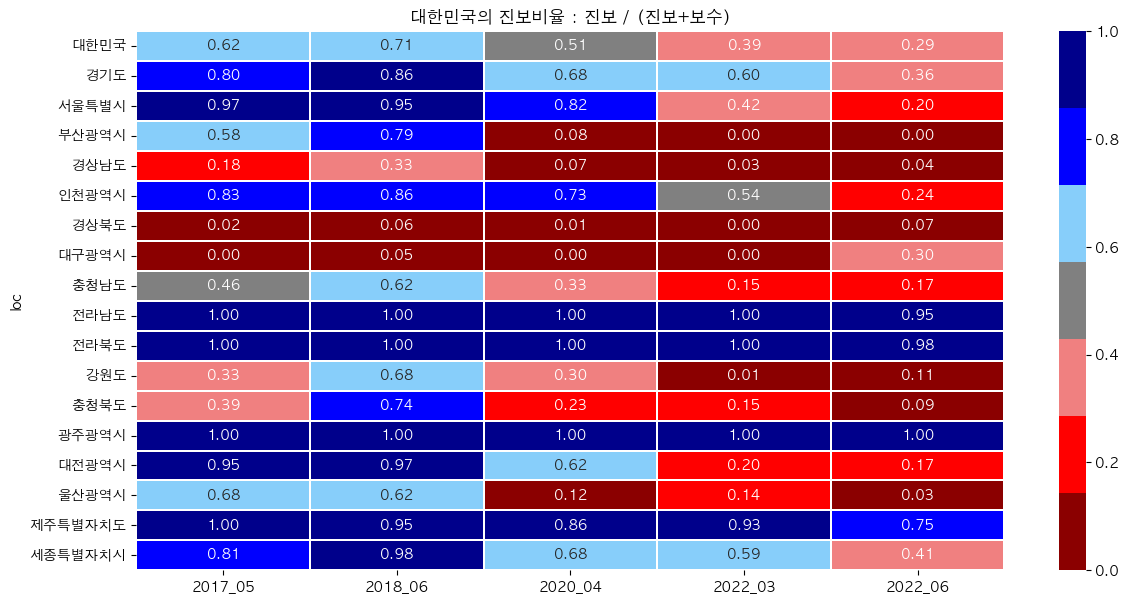

In [21]:
plt.figure(figsize=(14, 7))
sns.heatmap(
    data=df,
    cmap=rgb,
    vmin=0,
    vmax=1,
    linewidths=0.1,
    annot=True,
    fmt=".2f",
)
plt.title("대한민국의 진보비율 : 진보 / (진보+보수)")
plt.show()